# Unit 5 - Financial Planning

In [50]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [51]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [52]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [53]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [54]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()
#print(json.dumps(response_btc,indent=4)) 

# Fetch current ETH price
response_eth = requests.get(eth_url).json()
#print(json.dumps(response_eth, indent=4))

# Compute current value of my crpto
my_btc_value = response_btc["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = response_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $19862.04
The current value of your 5.3 ETH is $1424.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [55]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [56]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [57]:
# Format current date as ISO format

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
start_date = pd.Timestamp("2022-09-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-15", tz="America/New_York").isoformat()

# Historical data for all stocks
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df_ticker.index = df_ticker.index.date

df_ticker.head()

AGG                                                          \
             open     high      low close   volume trade_count       vwap   
2022-09-15  99.04  99.1057  98.8436  98.9  5726225       15095  98.942986   

               SPY                                                            
              open    high     low   close    volume trade_count        vwap  
2022-09-15  392.89  395.96  388.78  390.12  87043825      604103  392.011342

In [58]:
# Pick AGG and SPY close prices

AGG_close_price = float(df_ticker["AGG"]["close"].values)
SPY_close_price = float(df_ticker["SPY"]["close"].values)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $98.9
Current SPY closing price: $390.12


In [59]:
# Compute the current value of shares
my_agg_value = my_agg * AGG_close_price
my_spy_value = my_spy * SPY_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19506.00
The current value of your 200 AGG shares is $19780.00


### Savings Health Analysis

In [60]:
# Set monthly household income
monthly_income = 12000

# Asset data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
total_amount_of_savings = crypto + shares

group_list = [[crypto], [shares]] # variable for the df_savings to be used as a list

# Create savings DataFrame
df_savings = pd.DataFrame(group_list, index=['Crypto', 'Shares'], columns=['Amount'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,21286.96
Shares,39286.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

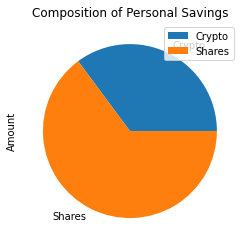

In [61]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [62]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_of_savings

difference = total_amount_of_savings - emergency_fund # difference that we need to cover for the conditional statement

# Validate saving health

print(f'The ideal emergency fund should be ${emergency_fund:0.2f}.')
print(f'My current total savings inclusive of Crypto and Shares ${total_amount_of_savings:0.2f}.')

if total_amount_of_savings > emergency_fund:
    print('Excellent I have enough money for this fund!')

if total_amount_of_savings == emergency_fund:
    print('Nearly there!')

if total_amount_of_savings < emergency_fund:
    print(f'I need to work on saving enough to cover the gap ${difference}.')


The ideal emergency fund should be $36000.00.
My current total savings inclusive of Crypto and Shares $60572.96.
Excellent I have enough money for this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [63]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
five_start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
five_end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()

In [64]:
# Get 5 years' worth of historical data for SPY and AGG
five_df_ticker = api.get_bars(
    tickers,
    timeframe,
    start = five_start_date,
    end = five_end_date
).df

# Reorganize the DataFrame
# Separate ticker data
five_AGG = five_df_ticker[five_df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
five_SPY = five_df_ticker[five_df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
five_df_ticker = pd.concat([five_AGG, five_SPY], axis=1, keys=["AGG", "SPY"])
five_df_ticker.index = five_df_ticker.index.date

# Display sample data
five_df_ticker.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2017-05-01  108.86  108.9599  108.620  108.73  2510027       11008   
2017-05-02  108.68  108.9400  108.679  108.88  2841518        9263   
2017-05-03  108.97  108.9900  108.770  108.77  1923403       10987   
2017-05-04  108.55  108.7000  108.550  108.68  1897912        7501   
2017-05-05  108.72  108.7400  108.570  108.70  1421843        7385   

                           SPY                                       \
                  vwap    open      high      low   close    volume   
2017-05-01  108.743679  238.66  239.1700  238.195  238.68  66882521   
2017-05-02  108.831870  238.82  238.9800  238.300  238.77  57375732   
2017-05-03  108.902870  238.29  238.8775  237.700  238.48  73137731   
2017-05-04  108.629678  238.81  238.9225  237.780  238.76  61462732   
2017-05-05  108.675918  239.16  239.7200  238.680  239.70  62001269   

                                    
           trade_count        vwap  
2017-05-01      180740  238.682276  
2017-05-02      176648  238.630973  
2017-05-03      223568  238.418100  
2017-05-04      208872  238.541805  
2017-05-05      204885  239.253410

In [65]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [66]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_five = MCSimulation(
    portfolio_data=five_df_ticker,
    num_simulation=num_sims,
    num_trading_days=252*30
)

In [67]:
# Printing the simulation input data
five_df_ticker.head(10)

AGG                                                   \
              open      high       low   close   volume trade_count   
2017-05-01  108.86  108.9599  108.6200  108.73  2510027       11008   
2017-05-02  108.68  108.9400  108.6790  108.88  2841518        9263   
2017-05-03  108.97  108.9900  108.7700  108.77  1923403       10987   
2017-05-04  108.55  108.7000  108.5500  108.68  1897912        7501   
2017-05-05  108.72  108.7400  108.5700  108.70  1421843        7385   
2017-05-08  108.63  108.6700  108.4900  108.49  3568402       12680   
2017-05-09  108.43  108.5100  108.4000  108.50  3084948        7734   
2017-05-10  108.60  108.6600  108.4400  108.53  1653429        8667   
2017-05-11  108.35  108.5400  108.3435  108.52  2331142        9679   
2017-05-12  108.81  108.9400  108.7800  108.92  1329696        7028   

                           SPY                                       \
                  vwap    open      high      low   close    volume   
2017-05-01  108.743679  238.66  239.1700  238.195  238.68  66882521   
2017-05-02  108.831870  238.82  238.9800  238.300  238.77  57375732   
2017-05-03  108.902870  238.29  238.8775  237.700  238.48  73137731   
2017-05-04  108.629678  238.81  238.9225  237.780  238.76  61462732   
2017-05-05  108.675918  239.16  239.7200  238.680  239.70  62001269   
2017-05-08  108.528034  239.77  239.9200  239.170  239.66  48385730   
2017-05-09  108.463623  239.94  240.1900  239.040  239.44  51363200   
2017-05-10  108.524494  239.37  239.8700  239.150  239.87  54293799   
2017-05-11  108.486079  239.31  239.5700  238.130  239.38  62269354   
2017-05-12  108.877713  239.05  239.4273  238.670  238.98  53912730   

                                    
           trade_count        vwap  
2017-05-01      180740  238.682276  
2017-05-02      176648  238.630973  
2017-05-03      223568  238.418100  
2017-05-04      208872  238.541805  
2017-05-05      204885  239.253410  
2017-05-08      153802  239.572890  
2017-05-09      190509  239.683266  
2017-05-10      152415  239.618396  
2017-05-11      211029  239.088106  
2017-05-12      158255  239.000514

In [68]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\dougl\Bootcamp\Course Material\Fintech_homework\05-APIs\Starter_Code\.ipynb_checkpoints\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004694,1.003183,0.995479,0.993946,0.989788,0.999145,1.008741,0.999817,0.995323,0.987892,...,1.002916,0.990579,1.005062,1.006209,1.005165,1.003278,0.999623,1.010002,1.012133,1.007286
2,1.006991,1.010872,0.994827,0.999165,0.982374,1.000510,1.010196,1.003797,0.987463,0.982021,...,0.999785,0.984052,1.003429,1.008906,1.008013,1.013003,1.010975,1.005742,1.012455,1.008921
3,1.005154,0.993273,0.994272,1.003154,0.987858,1.002884,1.013318,1.008162,0.980121,0.986816,...,0.990944,0.990373,1.001865,1.003763,1.013010,1.016338,1.004158,1.009634,1.019796,1.007828
4,1.010641,0.987359,0.986217,1.004469,0.985993,1.007465,1.003205,1.015928,0.991728,0.996897,...,0.992284,0.986568,0.994913,1.002526,1.015943,1.015074,1.022319,1.003094,1.021971,1.001209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.295907,6.614825,4.889298,4.626589,7.129758,3.322436,7.304094,1.641828,14.098697,3.448307,...,2.079130,5.896706,8.078233,3.108300,5.169477,5.378193,5.363005,5.459339,3.286588,15.574856
7557,2.289103,6.666522,4.855053,4.622509,7.166700,3.299672,7.336399,1.639753,14.193247,3.478095,...,2.092414,5.898106,8.082253,3.111309,5.166895,5.390312,5.365689,5.341749,3.263836,15.445323
7558,2.280149,6.676308,4.904732,4.630274,7.124062,3.324588,7.352731,1.642943,14.189469,3.497168,...,2.096168,5.954443,8.020441,3.101609,5.185667,5.360087,5.311084,5.407055,3.271502,15.427175
7559,2.299361,6.595607,4.906063,4.661073,7.016931,3.324291,7.316148,1.641831,14.210947,3.473815,...,2.119376,6.010777,8.012889,3.104805,5.144506,5.378578,5.227502,5.419373,3.280591,15.454145


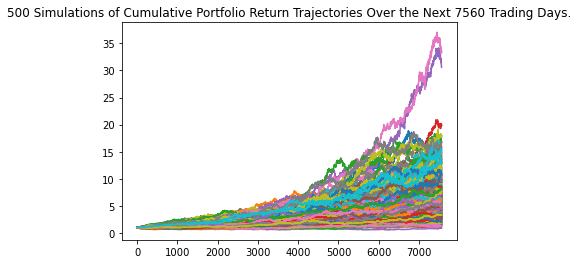

In [69]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

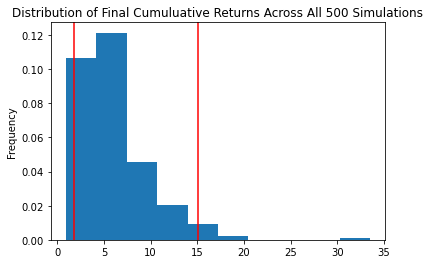

In [70]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five.plot_distribution()


### Retirement Analysis

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.058128
std               3.780109
min               0.897098
25%               3.430110
50%               4.934303
75%               7.447129
max              33.512421
95% CI Lower      1.733696
95% CI Upper     15.074709
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [72]:
# Set initial investment
from mimetypes import init


initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34673.93 and $301494.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [73]:
# Set initial investment
increase_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
increase_ci_lower = round(tbl[8]*increase_initial_investment,2)
increase_ci_upper = round(tbl[9]*increase_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increase_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${increase_ci_lower} and ${increase_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $52010.89 and $452241.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [74]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_five_five = MCSimulation(
    portfolio_data=five_df_ticker,
    num_simulation=num_sims,
    num_trading_days=252*5
)

In [75]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\dougl\Bootcamp\Course Material\Fintech_homework\05-APIs\Starter_Code\.ipynb_checkpoints\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997098,1.003051,1.013145,1.006803,0.997228,1.001033,1.012317,0.999830,0.998565,0.990728,...,0.999431,0.989430,1.001048,1.002524,0.995239,1.005618,1.004281,0.997890,1.012496,0.994137
2,0.991705,0.992891,1.018866,0.991956,0.993991,0.996416,1.017421,0.996907,0.991012,0.984414,...,0.997833,0.994397,1.001147,1.008106,0.995715,1.007227,1.011511,0.998219,0.991093,1.000280
3,0.989804,0.984593,1.014654,0.992347,1.002710,1.002297,1.015386,0.996753,0.997109,0.976117,...,1.009689,0.991917,1.003415,1.016093,0.996781,1.010889,1.006270,0.999368,0.980260,1.010625
4,0.990380,0.984089,1.005378,0.986774,0.999036,1.001741,1.014101,0.990071,0.995878,0.978846,...,1.012955,0.989158,1.009321,1.018387,0.996907,1.004713,1.001345,1.000342,0.987112,1.015113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.765599,1.629143,1.169657,1.272945,1.154805,1.713788,2.190862,1.167025,1.222984,1.041255,...,1.352386,1.499586,1.287811,0.810890,1.280529,1.490033,1.392315,1.745732,1.405664,1.347397
1257,1.774864,1.640277,1.159945,1.262679,1.156881,1.719648,2.192308,1.172053,1.227260,1.039169,...,1.347981,1.506131,1.286738,0.806400,1.281830,1.478564,1.393683,1.745547,1.414632,1.342748
1258,1.773712,1.642095,1.168601,1.247534,1.165496,1.730259,2.197150,1.169407,1.232299,1.033908,...,1.349179,1.499781,1.296956,0.807594,1.287523,1.472288,1.412074,1.757655,1.405368,1.338510
1259,1.766045,1.633721,1.152441,1.242716,1.165389,1.720913,2.194972,1.180282,1.216121,1.027432,...,1.374206,1.504328,1.298648,0.805361,1.286545,1.476666,1.409468,1.746153,1.391245,1.337240


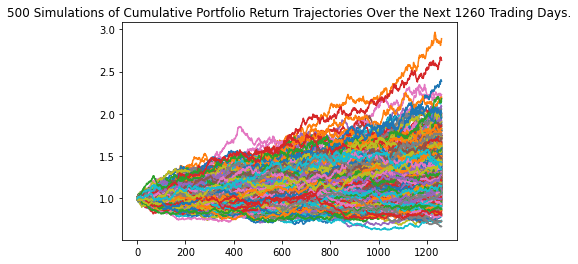

In [76]:
# Plot simulation outcomes
five_line_plot = MC_five_five.plot_simulation()

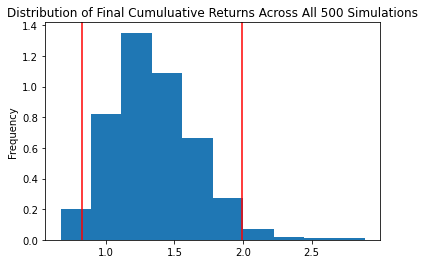

In [77]:
# Plot probability distribution and confidence intervals
five_dist_plot = MC_five_five.plot_distribution()


In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_five.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              6.058128
std               3.780109
min               0.897098
25%               3.430110
50%               4.934303
75%               7.447129
max              33.512421
95% CI Lower      1.733696
95% CI Upper     15.074709
Name: 7560, dtype: float64


In [79]:
# Set initial investment
initial_investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_tbl[8]*initial_investment,2)
ci_upper_five = round(five_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $34673.93 and $301494.18


### Ten Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_five_ten = MCSimulation(
    portfolio_data=five_df_ticker,
    num_simulation=num_sims,
    num_trading_days=252*10
)

In [81]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_five_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\dougl\Bootcamp\Course Material\Fintech_homework\05-APIs\Starter_Code\.ipynb_checkpoints\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002092,1.009582,1.003929,0.996294,0.998809,0.996801,0.995990,1.010736,1.011633,1.006426,...,0.997024,0.989845,0.994924,0.996020,1.000839,0.997630,0.995747,1.012688,0.996891,1.002240
2,1.004274,1.009063,1.007290,1.000767,0.998019,0.996496,1.004101,0.992933,1.010526,1.008028,...,1.003013,0.989976,0.995304,0.989184,0.991512,0.989283,0.984744,1.017470,0.989533,1.010544
3,1.009371,1.008719,1.009805,1.010663,0.994241,0.995480,0.994600,0.990084,1.009610,1.002702,...,1.009005,0.988830,0.981326,0.990306,0.996655,0.992206,0.981755,1.023742,0.988333,1.004801
4,0.997592,1.014113,1.015261,1.003601,0.987824,1.005918,0.986038,0.989648,1.010461,1.016826,...,1.001443,0.992702,0.973621,0.976542,0.993416,0.999033,0.991270,1.014858,0.979706,0.999945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.359422,1.852138,1.781751,1.395078,3.470507,0.832896,1.647066,1.717073,2.006758,1.660981,...,1.083898,1.044426,1.342532,1.506103,1.507629,2.531726,1.944651,1.506804,1.606499,2.499492
2517,2.338859,1.863838,1.786260,1.403115,3.476689,0.840848,1.640036,1.717476,2.022321,1.662711,...,1.088659,1.040718,1.344161,1.513486,1.516954,2.546899,1.967528,1.523362,1.625993,2.496974
2518,2.321140,1.861738,1.800544,1.399933,3.527988,0.837876,1.654650,1.714340,2.015059,1.653287,...,1.089594,1.039397,1.331033,1.517347,1.512538,2.553166,1.976391,1.538656,1.635137,2.481885
2519,2.320970,1.859199,1.809167,1.409647,3.503980,0.844338,1.630349,1.706357,2.024409,1.647468,...,1.091769,1.047977,1.339411,1.510995,1.521819,2.558464,1.943449,1.534285,1.646193,2.490806


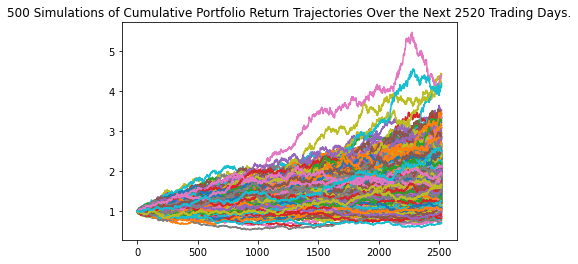

In [82]:
# Plot simulation outcomes
ten_line_plot = MC_five_ten.plot_simulation()

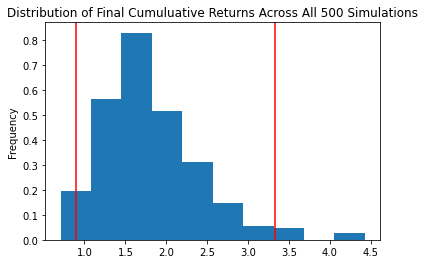

In [83]:
# Plot probability distribution and confidence intervals
ten_dist_plot = MC_five_ten.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_five_ten.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           500.000000
mean              1.813149
std               0.595740
min               0.707411
25%               1.409486
50%               1.688980
75%               2.110923
max               4.425513
95% CI Lower      0.900226
95% CI Upper      3.330443
Name: 2520, dtype: float64


In [85]:
# Set initial investment
initial_investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_tbl[8]*initial_investment,2)
ci_upper_ten = round(ten_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18004.52 and $66608.85
